**Deltagere:**
- Andreas Høgh (201908525)
- Orhan Djafari Gazrani (201606693)
- Muheebrahman Rahmani (201903896)

**gruppe** 25 

**Dato:** [17-09-2023]





# Intro

I denne opgave arbejdes der med data som fortæller om der er en sammenligning mellem økonomi (GDP) og livstilfredshed for forskellige lande.

Så datasættet indeholder information om økonomiske faktorer (GDP) og sociale faktorer (livstilfredshed), og målet er at se, om der er en sammenhæng mellem de to, og i hvilket omfang økonomiske faktorer kan forudsige livstilfredshedsscoren for et givet land.

## Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # SWMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

print("OK")

OK


In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print("OK")

OK


The code in the book expects the data files to be located in the current directory. I just tweaked it here to fetch the files in datasets/lifesat.

In [3]:
import os
datapath = os.path.join("../datasets", "lifesat", "")

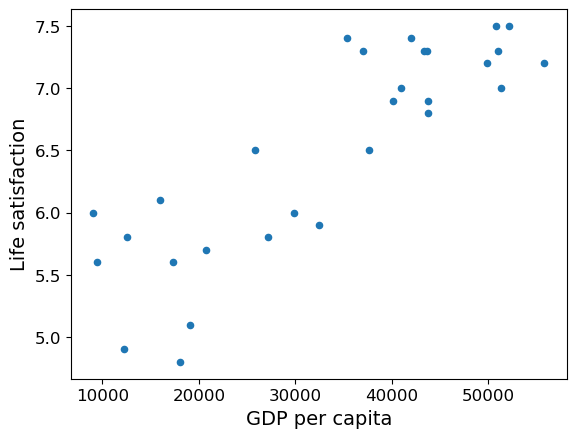

[[5.96242338]]
OK


In [4]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
try:
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
except Exception as e:
    print(f"SWMAL NOTE: well, you need to have the 'datasets' dir in path, please unzip 'datasets.zip' and make sure that its included in the datapath='{datapath}' setting in the cell above..")
    raise e
    
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

print("OK")

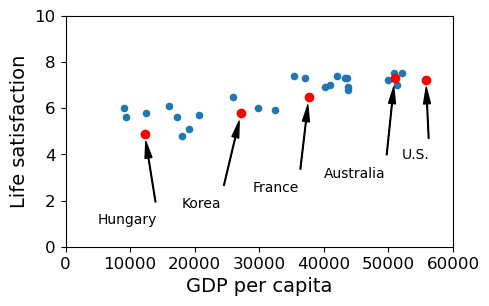

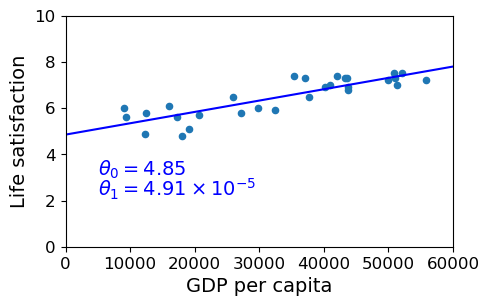

OK


In [5]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)

t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

print("OK")

## Qa) The $\theta$ parameters and the $R^2$ Score

I denne opgave undersøges brug af lineær regression og scikit-learn til at trække vigtige oplysninger fra en lineær regressionsmodel og beregne $R^2$-scoren.

Koefficienterne $\theta_0$ og $\theta_1$ kan udtrækkes fra en lineær regressionsmodel i scikit-learn ved hjælp af hhv. intercept_ og coef_ funktionerne

$R^2$-scoren beregnes for en lineær regressionsmodel ved at bruge model.score(X, y) i scikit-learn. "Den måler, hvor godt modellen passer til data ved at kvantificere, hvor meget af variansen i den afhængige variabel (y) forklaret af de uafhængige variabler (X)." citat chatGPT.

Minimale værdi for $R^2$-scoren er $-\infty$, mens den maksimale værdi er 1. En score på 1 indikerer en perfekt tilpasning, mens en negativ score indikerer, at modellen er værre end en simpel konstant model.

Det er bedst at have en høj $R^2$-score, da den måler fitness/goodness. $R^2$-scoren måler, hvor godt modellen passer til de observerede data.

Nedenstående kode viser at modellen har en $R^2$-score på 0.734 på de data som er defineret.

In [6]:
# Extract the coefficients
theta_0 = model.intercept_ 
theta_1 = model.coef_[0]   

# Print the coefficients
print("Intercept (𝜃0):", theta_0)
print("Slope (𝜃1):", theta_1)

# R2 score
model.score(X,y)

Intercept (𝜃0): [4.8530528]
Slope (𝜃1): [4.91154459e-05]


0.734441435543703

### Qb) Using k-Nearest Neighbors

I denne opgave bruges modellen `sklearn.neighbors.KNeighborsRegressor`.

Knn estimerer værdier ved at se på de nærmeste "naboer" datasættet. Præcisionen kan justeres ved at vælge, hvor mange "naboer" den skal tage hensyn til (k-værdien).

kNN regressor bruger R2 som score, mens lineær regression også bruger R2. De scoren for det 2 modeller er derfor sammenlignelige

R2 er en score, der hjælper os med at se, hvor godt vores model passer til vores data. Den fortæller os, hvor meget vores forudsigelser ligner de faktiske resultater. Høj R2 betyder, at vores model passer rigtig godt, mens lav R2 betyder, at den ikke gør det så godt. Denne metode er velegnet til regression.

I nedenstående kodeblok er der trænet en model med 3 naboer hvorefter der bliver forudsagt en værdi for Cypern's GDP per capita vha. modellen. Til sidst beregner det også en score for modellen på samme måde som lineær regression.

X.shape= (29, 1)
y.shape= (29, 1)


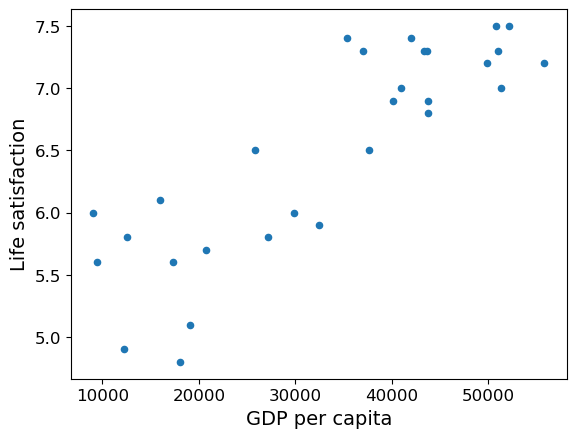

[[5.76666667]]


0.8525732853499179

In [7]:
# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select and train a model
from sklearn.neighbors import KNeighborsRegressor

k = 3  # Antal naboer
knn = KNeighborsRegressor(n_neighbors=k)  # Opret en k-NN-regressionsmodel med k naboer
knn.fit(X, y)  # Træn modellen
y_pred = knn.predict([[22587]])
print(y_pred) 
knn.score(X,y)

### Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check

I denne opgave er det undersøgt, hvordan ændringen i k_neighbor-parameteren påvirker KNeighborsRegressor-modellen. 

Der blev oprettet tre plots for at sammenligne modellernes præstationer for forskellige k-værdier:

K-NN med k = 3.
K-NN med k = 20.
K-NN med k = 1.

Resultaterne viste, at KNeighborsRegressor-modellen med k = 1 var i stand til at tilpasse sig træningsdataene med en score på 1. Dette indikerer dog en potentiel overfitting, hvilket betyder at modellen får svært ved at generalisere, når den modtager ny data. Ved en k-værdi på 20 er der højst sandsynligt en underfitting da modellen ikke er særligt præcis. Ved at justere k-værdien kan vi styre modellens kompleksitet og evnen til at generalisere til nye data.

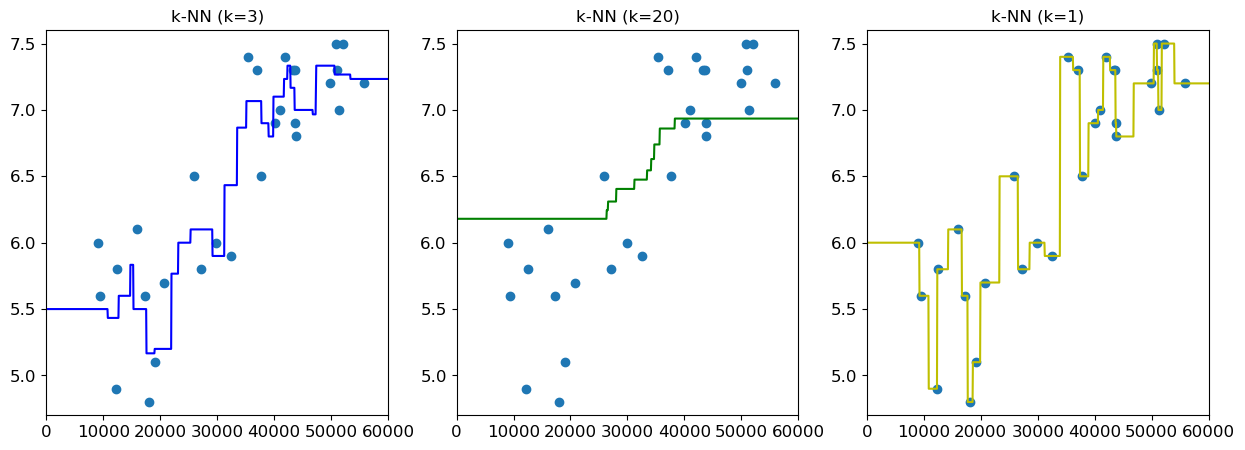

In [8]:
# create a test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m = np.linspace(0, 60000, 1000)
M = np.empty([m.shape[0], 1])
M[:, 0] = m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = model.predict(M)
y_pred_knn = knn.predict(M)   # ASSUMING the variable name 'knn' of your KNeighborsRegressor 

knn20 = KNeighborsRegressor(n_neighbors=20)  # Create a k-NN regression model with 20 neighbors
knn20.fit(X, y)  # Train the model
y_pred_knn20 = knn20.predict(M)

knn1 = KNeighborsRegressor(n_neighbors=1)  # Create a k-NN regression model with 1 neighbor
knn1.fit(X, y)  # Train the model
y_pred_knn1 = knn1.predict(M)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for k=3
axes[0].scatter(X, y)
axes[0].plot(m, y_pred_knn, "b")
axes[0].set_title("k-NN (k=3)")

# Plot for k=20
axes[1].scatter(X, y)
axes[1].plot(m, y_pred_knn20, "g")
axes[1].set_title("k-NN (k=20)")

# Plot for k=1
axes[2].scatter(X, y)
axes[2].plot(m, y_pred_knn1, "y")
axes[2].set_title("k-NN (k=1)")

for ax in axes:
    ax.axis([0, 60000, 4.7, 7.6])

plt.show()


### Qd) Trying out a Neural Network

I denne opgave er brugen af en neuralt netværk udforsket ved hjælp af Scikit-learns MLPRegressor på vores data.

Det er vigtigt at bemærke, at vores data ikke er skalerede, hvilket oftest giver et ubrugeligt output for MLPRegressor.

Vi trænede mlp-modellen med vores data og forudsagde værdien for Cypern ved hjælp af denne model. Vi beregnede også score-værdien for træningssættet, på samme måde som vi gjorde for de lineære og KNN-modeller.

MLPRegressor's score-funktion bruger samme score, R2, som LinearRegression. Den kan ikke sammenlignes med scoren for knn.
"score(X, y[, sample_weight]) Return the coefficient of determination of the prediction." citat https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

Nedenstående kode opretter og træner en MLPRegressor, laver forudsigelser og sammenligner resultaterne med lineær regression og kNN modeller. Den viser grafer for hver model og udskriver forudsagte værdier og scores for MLPRegressor. Resultatet afviger meget fra 

Iteration 1, loss = 290434295.23044360
Iteration 2, loss = 286926974.91845930
Iteration 3, loss = 283445091.80120468
Iteration 4, loss = 279989007.88284469
Iteration 5, loss = 276559070.05886549
Iteration 6, loss = 273155609.32856679
Iteration 7, loss = 269778940.07033998
Iteration 8, loss = 266429359.38609853
Iteration 9, loss = 263107146.52031821
Iteration 10, loss = 259812562.35816029
Iteration 11, loss = 256545849.00610605
Iteration 12, loss = 253307229.45747611
Iteration 13, loss = 250096907.34413815
Iteration 14, loss = 246915066.77466321
Iteration 15, loss = 243761872.25819016
Iteration 16, loss = 240637468.71230754
Iteration 17, loss = 237541981.55239332
Iteration 18, loss = 234475516.85906243
Iteration 19, loss = 231438161.61967900
Iteration 20, loss = 228429984.03930050
Iteration 21, loss = 225451033.91592681
Iteration 22, loss = 222501343.07455081
Iteration 23, loss = 219580925.85422322
Iteration 24, loss = 216689779.64216983
Iteration 25, loss = 213827885.44891000
Iteration

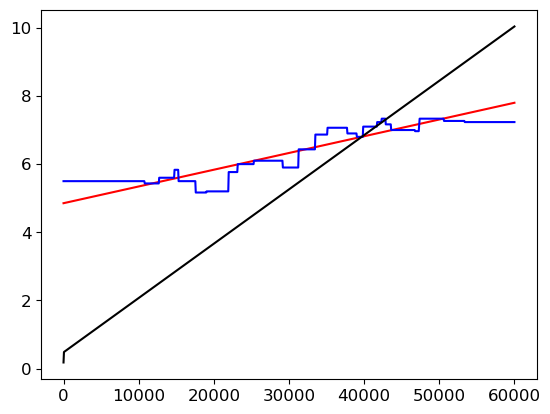

In [9]:
from sklearn.neural_network import MLPRegressor

# Setup MLPRegressor
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)
mlp.fit(X, y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M) 

plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp, "k")

cyprus_life_satisfaction = mlp.predict(M)
print(f"Predicted Life Satisfaction for Cyprus: {cyprus_life_satisfaction[0]}")

mlp_score = mlp.score(X, y)
print(f"MLPRegressor Score: {mlp_score}")

# SWMAL Exercise

## Python Basics

#### Qa Indlæs og test modulet libitmal

In [14]:
import sys, os 
# Denne linje kode tilføjer den angivne mappesti til listen over stier
sys.path.append(os.path.expanduser('C:/Users/Moheb/OneDrive/Desktop/Semester 6/MAL/GITMAL'))

# Denne linje kode import utils fra libitmal mappe
from libitmal import utils as itmalutils
itmalutils.TestAll()

TestPrintMatrix...(no regression testing)
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
X=[[ 1.  2.]
   ...
   [ 1. -1.]]
X=[[   1.
       2.    ]
   [   3.0001
    -100.    ]
   [   1.
      -1.    ]]
X=[[   1.    2.]
   [   3. -100.]
   [   1.   -1.]]
OK
TEST: OK
ALL OK


In [ ]:
# Koden ovenpå tilføjer en angiven mappesti til systemets stilliste, hvilket giver adgang til brugerdefinerede moduler.
# Derefter importeres et hjælpeprogram med navnet "utils" fra mappen "libitmal" og kører tests på det ved hjælp af
# "itmalutils.TestAll()." Output viser testresultaterne, herunder forskellige matrixmanipulationer og deres
# forventede resultater. "OK" i slutningen angiver, at alle tests er bestået med succes og bekræfter den korrekte
# funktionalitet af hjælpeprogrammet.

#### Qb Opret og test af module

In [3]:
import sys, os 
sys.path.append(os.path.expanduser('C:/Users/Bruger/Desktop/Semester 6/Machine Learning/GITMAL/libitmal'))
from MyModule import Module as module
module.TestAll()

8
120
15


In [ ]:
# Koden oven på forklare at inde i Libitmal er der oprettet en modul ved navn MyModule, og 'Module.py' er blevet 
# oprettet indeni den. Module.py har nogle funktioner:
# add_two_numbers(a, b): Denne funktion tager to parametre og lægger dem sammen.
# find_factorial(n): Denne funktion tager et tal som input og returnerer dets faktorial.
# sum_of_list_elements(list): Denne funktion beregner summen af elementerne i listen.
# TestAll(): Denne funktion kalder alle de ovenstående funktioner og udskriver deres resultater

#### Qc Module recompile

In [ ]:
# Du kan bruge modulet 'importlib' til at genindlæse modulet eksplicit. 'Importlib' modulet vil tvinge jupyter notebook
# til at genindlæse modulændringerne. f.eks.
# import importlib -- Denne linje vil importere 'importlib' modulet
# import my_module -- Importer modulet med nye ændringer
# importlib.reload(my_module) -- Denne linje vil tvinge jupyter til at genindlæse modulet (my_module)


#### Qe Klasse udvidelse med nogle funktioner og membervariabler

In [11]:
class MyClass:
   
    def myfun(self):
        self.myvar = "blah" B# En pr. klasse-instansvariabel
        print(f"This is a message inside the class, myvar={self.myvar}.")

myobjectx = MyClass()


# Efter at have kørt koden uden 'self'-parameter

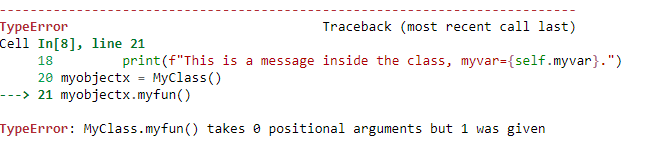

In [ ]:
# 'self' er et konventionelt anvendt navn til den første parameter i instansmetoder i en klasse.
# Det henviser til instansen selv, hvilket giver dig mulighed for at få adgang til og manipulere dens
# attributter og kalde dens metoder.
#--------------------------------------------------------------------------------------------------------------

# Billedet ovenpå viser en 'TypeError', der er blevet rejst. Det betyder, at myfun() ikke har en self-parameter.
# Python forventer, at der overføres et argument (instansen selv) til metoden.

#### Qf Udvidelser af Konstruktor

In [16]:
class MyClass:
    def __init__(self,parameter1, parameter2):
        self.parameter1 = parameter1
        self.parameter2 = parameter2
    
object = MyClass("Hello", 12)
print(object.parameter1)

Hello


In [1]:
# I Python kan du definere en konstruktør ved at tilføje en metode kaldet init. init er en speciel metode, der kaldes
# automatisk når en instans af klassen oprettes. f.eks. __init__ i klassen "MyClass," 
# som initialiserer objekter med to parametre, parameter1 og parameter2, og gemmer dem som objekters attributter.
# Når et objekt oprettes med MyClass("Hello", 12), bliver parameter1 til "Hello" og parameter2 til 12.
#-------------------------------------------------------------------------------------------------------
# Python har ikke en traditionel destruktør som i C++. Python administrerer hukommelsen automatisk ligesom i C#.
# Derfor er der ingen behov for en destruktør.

#### Qg Udvidelse af klassen med to-string function

In [19]:
class MyClass:
    def __init__(self, job):
        self.job = job

    def __str__(self):
        return f" JobName='{self.job}'"

# opret en instance af MyClass
obj = MyClass("Engineer")
print(obj)


 JobName='Engineer'


In [ ]:
# Python bruger en speciel metode kaldet str. Denne metode kaldes automatisk, når man bruger print() funktionen med en
# instans af klassen (self).f eks. metoden ovenpå returnerer en tilpasset strengrepræsentation af objektet, hvor
# "JobName='Engineer'" er strengen, der udskrives i stedet for den standardrepræsentation

# cost_function


#### Qa

Følgende designmatrix skal laves og printes:
$$
    \ar{rl}{
      \bx\pown{1} &= \ac{c}{ 1, 2, 3}^T \\
      \bx\pown{2} &= \ac{c}{ 4, 2, 1}^T \\
      \bx\pown{3} &= \ac{c}{ 3, 8, 5}^T \\
      \bx\pown{4} &= \ac{c}{-9,-1, 0}^T
    }
$$
I kodeblokken importeres de nødvendige biblioteker, herunder NumPy og math. Derefter defineres vektorerne, x1, x2, x3 og x4, der repræsenterer hver søjlevektor i matrixen. Disse vektorer udgør feature-værdierne.

Herefter anvendes NumPy's vstack-funktion til at stable de definerede vektorer vertikalt, hvilket resulterer i oprettelsen af matricen X.

Endelig bruges print-funktionen til at udskrive matricen.

In [2]:
import numpy as np
import math

y = np.array([1,2,3,4]) # actual values

# Define the given vectors 𝐱(𝑖)
x1 = np.array([1, 2, 3])
x2 = np.array([4, 2, 1])
x3 = np.array([3, 8, 5])
x4 = np.array([-9, -1, 0])

X = np.vstack((x1, x2, x3, x4))

# Print the resulting 𝐗 matrix
print(X)


[[ 1  2  3]
 [ 4  2  1]
 [ 3  8  5]
 [-9 -1  0]]


#### Qb

I opgaven blev arbejdet med beregning af normer eller afstande mellem vektorer. To typer blev undersøgt: $\norm{1}$, og $\norm{2}$.

Normerne blev først matematisk defineret og derefter implementeret i Python uden brug af biblioteker som math.sqrt eller numpy.linalg.norm. Først blev en 'low-level' implementering oprettet ved hjælp af grundlæggende operationer som +, *, og ** for at beregne normerne.

Implementeringerne blev testet ved sammenligning med forventede resultater for at sikre korrekt funktion, vha. 'assert' funktionen

Efter bekræftelse af test implementeringer blev $\norm{2}$ optimeret ved at bruge np.numpy's dot-operator i stedet for en eksplicit sum. Denne optimerede version blev kaldt L2Dot.



In [9]:
def L1(vector):
    assert isinstance(vector, np.ndarray), "Input must be a NumPy array"
    l1_norm = 0
    for element in vector:
        l1_norm += element if element >= 0 else -element
    return l1_norm

def L2(vector):
    assert isinstance(vector, np.ndarray), "Input must be a NumPy array"
    l2_norm = np.dot(vector.T, vector) ** 0.5
    return l2_norm

def L2Dot(vector):
    assert isinstance(vector, np.ndarray), "Input must be a NumPy array"
    return np.sqrt(np.dot(vector, vector))

    

# TEST vectors: here I test your implementation...calling your L1() and L2() functions
tx=np.array([1, 2, 3, -1])
ty=np.array([3,-1, 4,  1])

expected_d1=8.0
expected_d2=4.242640687119285

d1=L1(tx-ty)
d2=L2(tx-ty)

print(f"tx-ty={tx-ty}, d1-expected_d1={d1-expected_d1}, d2-expected_d2={d2-expected_d2}")

eps=1E-9 
# NOTE: remember to import 'math' for fabs for the next two lines..
assert math.fabs(d1-expected_d1)<eps, "L1 dist seems to be wrong" 
assert math.fabs(d2-expected_d2)<eps, "L2 dist seems to be wrong" 

print("OK(part-1)")

# comment-in once your L2Dot fun is ready...
d2dot=L2Dot(tx-ty)
print("d2dot-expected_d2=",d2dot-expected_d2)
assert math.fabs(d2dot-expected_d2)<eps, "L2Ddot dist seem to be wrong" 
print("OK(part-2)")

tx-ty=[-2  3 -1 -2], d1-expected_d1=0.0, d2-expected_d2=0.0
OK(part-1)
d2dot-expected_d2= 0.0
OK(part-2)


### Qc

I opgaven blev der arbejdet med implementeringen af cost-funktionen 𝐽 og specifikt root mean squared error (RMSE).



Først blev funktionen RMSE lavet. Denne funktion tager to input: forudsagte værdier (predictions) og faktiske værdier (actual_values). Internt bruges den tidligere implementerede L2-norm-funktion, L2Dot, til at beregne kvadrerede fejl. Herefter multipliceres resultatet med 1/2 for at opnå RMSE-værdien.

En dummy hypotese-funktion, ℎ𝑑𝑢𝑚𝑚𝑦, blev givet for at returnerer den første kolonne af designmatricen fra opgave Qa.

Endelig blev RMSE-funktionen testet ved at give den hypotesefunktionen samt y fra opgave Qa som inputs. Resultatet blev sammenlignet med forventede værdier for at bekræfte korrektheden af RMSE-beregningerne.

In [12]:
def RMSE(predictions, actual_values):
    assert len(predictions) == len(actual_values), "Input arrays must have the same size"
    error = predictions - actual_values
    rmse = 1/2 * (L2(error))  # Call the L2 function to calculate the squared error
    return rmse

# Dummy h function:
def h(X):    
    if X.ndim!=2:
        raise ValueError("excpeted X to be of ndim=2, got ndim=",X.ndim)
    if X.shape[0]==0 or X.shape[1]==0:
        raise ValueError("X got zero data along the 0/1 axis, cannot continue")
    return X[:,0]

# Calls your RMSE() function:
r=RMSE(h(X),y)

# TEST vector:
eps=1E-9
expected=6.57647321898295
print(f"RMSE={r}, diff={r-expected}")
assert math.fabs(r-expected)<eps, "your RMSE dist seems to be wrong" 

print("OK")

RMSE=6.576473218982953, diff=2.6645352591003757e-15
OK


#### Qd

I denne opgave blev der udviklet en funktion til at beregne Mean Absolute Error (MAE). MAE beregnes ved at bruge L1 funktionen og sammenligne predicted values med actual values og beregne gennemsnittet af absolutte fejl for hvert datapunkt.

Funktionen MAE blev implementeret som vist nedenfor. Den tager de to inputarrays, predictions og actual_values, og kontrollerer først, om de har samme størrelse. Herefter beregnes fejlene ved at trække actual_values fra predictions. MAE-værdien opnås ved at tage gennemsnittet af absolutværdierne ved at gange med 1/4, da der er 4 værdier i hver vektor.

In [11]:
# TODO: solve Qd
def MAE(predictions, actual_values):
    assert len(predictions) == len(actual_values), "Input arrays must have the same size"
    error = predictions - actual_values
    mae = 1/4 * L1(error)  # Call the L2 function to calculate the squared error
    return mae

# Calls your MAE function:
r=MAE(h(X), y)

# TEST vector:
expected=3.75
print(f"MAE={r}, diff={r-expected}")
assert abs(r-expected)<eps, "MAE dist seems to be wrong" 

print("OK")

MAE=3.75, diff=0.0
OK


#### Qe Robust Code 

I funktionerne RMSE MAE er der lavet en assert som tjekker, om længden af inputarrays predictions og actual_values er ens. Hvis de ikke har samme størrelse, udløser assert en fejl med den angivne meddelelse: "Input arrays must have the same size."

For L1 og L2 funktionerne tjekkes der for, om inputparameteren vector er en NumPy-array. Hvis vector ikke er en NumPy-array, udløser assert en AssertionError med meddelelsen: "Input must be a NumPy array."

### Qf Conclusion


I disse øvelser har vi dykket ned i grundlæggende begreber inden for ML, især fokuseret på vektor- og matrixoperationer, norms, cost function fejlmetrikker og robust kode. Her er de vigtigste pointer:

Vektor- og Matrixoperationer: Vi lærte, hvordan man repræsenterer datasamples som vektorer og konstruerer datamatricer. Disse operationer er afgørende for at arbejde med data inden for maskinlæring, da de fleste algoritmer er afhængige af matrixmanipulationer.

Normer og Afstande: Vi udforskede L1 (Manhattan-normen) og L2 (Euklidisk norm) for vektorer. Forståelse af disse normer er afgørende for at måle afstande mellem data punkter.

Fejlmetrikker: Vi implementerede to fejlmetrikker, RMSE og MAE. Disse metrikker hjælper med at vurdere performance af modellerne ved at kvantificere forskellen mellem predicted og actual values.

Robusthed: Vi fik en forståelse for hvordan man skriver robust kode ved at inkludere fejltjekning og datavalidering. Dette sikrer, at vores funktioner håndterer uventede input på en hensigtsmæssig måde.

Gennem disse øvelser dykkede vi dybere ned i matematikken bag maskinlæringsalgoritmer, lærte at måle fejl og afstande mellem datapunkter samt forstod vigtigheden af nøjagtighed og robust kodning i maskinlæring.

# SWMAL Exercise

## Implementing a dummy binary-classifier with fit-predict interface

#### Qa  Load and display the MNIST data

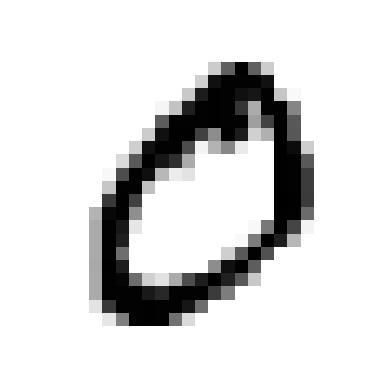

In [4]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

def MNIST_HentDatasæt():
    # For at undertrykke parseradvarslen er parseren blevet brugt
    X, y = fetch_openml('mnist_784', return_X_y=True, parser='liac-arff', cache=False, as_frame=False)
    return X, y

# Formerer et billededata punkt (data) og ændrer formen fra 1D-array til 2D-array
def MNIST_PlotCiffer(data):
    billede = data.reshape(28, 28)
    # Farverne er sort og hvid
    plt.imshow(billede, cmap=plt.cm.binary, interpolation="nearest")
    plt.axis("off")

X, y = MNIST_HentDatasæt()

ciffer_at_plotte = X[1]  # For eksempel: X[0] for at vælge det anden ciffer i datasættet

# Eksempel på brug af funktionerne til at indlæse og plotte en enkelt ciffer
MNIST_PlotCiffer(ciffer_at_plotte)
plt.show()


In [1]:
# Koden ovenpå indlæser et billede af tallet "0" fra datasættet og bruger derefter matplotlib til at plotte tallet på 
# skærmen. Datasættet indeholder forskellige billeder af håndskrevne tal, og koden vælger det andet billede fra datasættet 
# og plotter det. Resultatet, som ses ovenfor, er en visuel repræsentation af det håndskrevne tal "0."

#### Qb  Add a Stochastic Gradient Decent [SGD] Classifier

X.shape=(70000, 784)


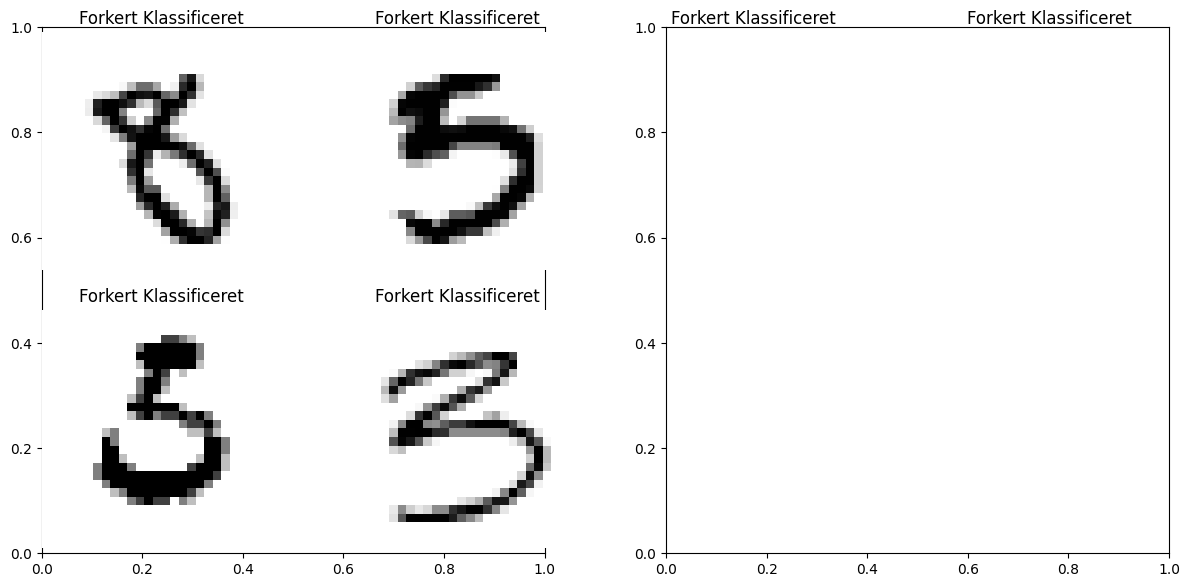

In [5]:
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

X, y = MNIST_HentDatasæt()

# train_test_split er blevet brugt til at opdele datasættet i trænings- og testdata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

if X.ndim == 3:
    print("Omformer X..")
    assert y.ndim == 1
    X = X.reshape((X.shape[0], X.shape[1] * X.shape[2]))
assert X.ndim == 2
print(f"X.shape={X.shape}")  # X.shape= (70000, 784)

y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(X_train, y_train_5)

# Laver forudsigelser på testdataene
y_pred = sgd_classifier.predict(X_test)

# Evaluer modelpræstation. Denne kode identificerer, hvilke prøver der blev korrekt klassificeret, og
# hvilke der blev klassificeret forkert baseret på de forudsigelser, som modellen lavede
korrekt_klassificerede_indekser = (y_pred == y_test_5)
korrekt_klassificerede_prøver = X_test[korrekt_klassificerede_indekser]
forkert_klassificerede_indekser = (y_pred != y_test_5)
forkert_klassificerede_prøver = X_test[forkert_klassificerede_indekser]

# Plott korrekt klassificerede prøver
plt.figure(figsize=(12, 6))

# Plott korrekt klassificerede prøver
plt.subplot(1, 2, 1)
for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    ax.imshow(korrekt_klassificerede_prøver[i].reshape(28, 28), cmap=plt.cm.binary)
    ax.set_title("Korrekt Klassificeret")
    ax.axis("off")

# Plott forkert klassificerede prøver
plt.subplot(1, 2, 2)
for i in range(8):
    ax = plt.subplot(2, 4, i + 1)
    ax.imshow(forkert_klassificerede_prøver[i].reshape(28, 28), cmap=plt.cm.binary)
    ax.set_title("Forkert Klassificeret")
    ax.axis("off")
    
plt.tight_layout()  # denne linje forhindrer overlapning af akser
plt.show()

In [ ]:
# Koden ovenpå træner en klassifikator (SGD-klassifikator) til at identificere tallet "5" i MNIST-datasættet, som indeholder
#håndskrevne tal. Den deler datasættet op i trænings- og testdata, træner klassifikatoren og laver derefter forudsigelser
# Resultatet, som ses ovenfor, viser at koden printer både korrekt og forkert klassificerede tal. Både korrekt og 
#forkert klassificerede tal vises side om side for at vise klassifikatorens præstation.

# Advarselsteksten indikerer, at den nuværende måde, Matplotlib håndterer overlappende akser, er forældet. ax.remove() og 
# plt.tight_layout() er blevet brugt for at fjerne advarslen, men det ikke lykkes
# løst af robot (AI)

#### Qc Implement a dummy binary classifier

I denne opgave beskrives processen med at implementere en simpel binær klassifikator ved hjælp af en Python-klasse.

Scikit-learn-klassifikatorer arver normalt fra BaseEstimator (og eventuelt også ClassifierMixin), og de skal have funktionerne, fit og predict. Selvom det er almindeligt at arve fra BaseEstimator, kan man også implementere en klasse, der indeholder fit- og predict funktioner, uden nødvendigvis at arve fra den.

I nedenstående kode er en simpel DummyClassifier-klasse implementeret. Dens fit-metode gør intet, og predict-metoden forudsiger altid klassen 0. En instans af DummyClassifier oprettes, og fit kaldes med træningsdata, hvor y_train_5 bruges som input. Derefter forudsiger predict-metoden klassifikationerne for testdataene, og nøjagtigheden beregnes ved hjælp af accuracy_score-funktionen fra scikit-learn. Resultatet af accuracy scoren på 0.909 giver mening eftersom man forventer et ikke 5-tal 90% af gangene. DummyClassifier i bogen p.107 får en lignende score.

In [19]:
from sklearn.metrics import accuracy_score
import numpy as np

class DummyClassifier:
    def fit(self, X, y):
        # Ingenting behøver at blive trænet, da forudsigelsen altid er den samme
        pass

    def predict(self, X):
        # Forudsæt altid klasse 0
        return np.zeros((X.shape[0],), dtype=int)



# Opret en instans af DummyClassifier
dummy_classifier = DummyClassifier()

# Træn dummyklassificatoren på træningssættet
dummy_classifier.fit(X_train, y_train_5)

# Forudsig klassifikationerne for testdataene
y_pred_dummy = dummy_classifier.predict(X_test)

# Beregn nøjagtigheden
accuracy_dummy = accuracy_score(y_test_5, y_pred_dummy)

print("Dummy Classifier Accuracy:", accuracy_dummy)

# Opgave løst med chatGPT


Dummy Classifier Accuracy: 0.9090714285714285


### Qd Conclusion

I denne opgave har vi udforsket MNIST-datasettet, som indeholder billeder af håndskrevne cifre. Vi begyndte med at indlæse og forberede dataene. Dette omfattede opdeling af dataene i trænings- og testdatasæt, hvilket er afgørende for at evaluere vores model på uafhængige data.

Derefter kastede vi os ud i træningsprocessen ved at bruge SGD Classifier, til at skelne cifret "5" fra de øvrige cifre.

Til sidst skabte vi en Dummy Classifier, der altid gav den samme forudsigelse, nemlig "0". Denne havde en accuracy på over 0.9, hvilket lyder højt, men eftersom kun 10% af tallene er 5-taller giver dette mening. Dummyclassifieren gav os derfor et baseline-referencepunkt til vurdering af vores faktiske model.

# SWMAL Exercise


## Performance Metrics

#### Qa Implementer nøjagtighedsfunktionen og test den på MNIST-dataene

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier

# Hent data fra MNIST-datasættet og undertryk parseradvarslen
X, y = fetch_openml('mnist_784', return_X_y=True, parser='liac-arff')

# Opdel datasættet i trænings- og testdata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Opret en simpel dummy-classifier som baseline
dummy_classifier = DummyClassifier(strategy="most_frequent")

# Træn dummy-classifieren
dummy_classifier.fit(X_train, y_train)

# Lav forudsigelser ved hjælp af dummy-classifieren
y_pred = dummy_classifier.predict(X_test)

# Opret en SGD-classifier
sgd_classifier = SGDClassifier(loss='hinge', random_state=42)

# Træn SGD-classifieren på træningsdataene
sgd_classifier.fit(X_train, y_train)

# Lav forudsigelser ved hjælp af SGD-classifieren
sgd_y_pred = sgd_classifier.predict(X_test)

# Definér MyAccuracy-funktionen
def MyAccuracy(y_true, y_pred): 
    
    # Find alle de korrekte forudsigelser (faktisk sande + sande forudsigelser)
    korrekte_forudsigelser = (y_true == y_pred).sum()
    
    # Summen af alle forudsigelser
    samlede_forudsigelser = len(y_true)  
    
    # Hvis nævneren er nul, skal det håndteres
    if samlede_forudsigelser == 0:
        raise ZeroDivisionError("Division med nul er ikke tilladt.")
    
    # Find nøjagtigheden ved hjælp af den angivne funktion
    min_nøjagtighed = korrekte_forudsigelser / samlede_forudsigelser
    return min_nøjagtighed

# Beregn nøjagtigheder ved hjælp af forskellige funktioner
nøjagtighed = accuracy_score(y_test, y_pred)
min_nøjagtighed = MyAccuracy(y_test, y_pred)
sgd_nøjagtighed = accuracy_score(y_test, sgd_y_pred)

# Udskriv alle nøjagtigheder
print(f"Nøjagtighed ved brug af accuracy_score: {nøjagtighed:.2f}")
print(f"Nøjagtighed ved brug af brugerdefineret nøjagtighedsfunktion: {min_nøjagtighed:.2f}")
print(f"Nøjagtighed ved brug af SGDClassifier: {sgd_nøjagtighed:.2f}")

Nøjagtighed ved brug af accuracy_score: 0.11
Nøjagtighed ved brug af brugerdefineret nøjagtighedsfunktion: 0.11
Nøjagtighed ved brug af SGDClassifier: 0.87


In [ ]:
# Begge nøjagtighedsmetoder, `accuracy_score` og den brugerdefinerede nøjagtighedsfunktion, producerer ens resultater,
# hvilket er en nøjagtighed på 0.11. Dette antyder, at begge metoder evaluerer klassifikationen ens for dummy-classifieren.
# På den anden side viser nøjagtigheden ved brug af SGDClassifier en væsentlig forbedring med en nøjagtighed på 0.87.
# Dette indikerer, at SGDClassifier er i stand til at træne på data og forudsige med betydeligt bedre præcision
# sammenlignet med dummy-classifieren og den brugerdefinerede funktion. Dette resultat underbygger SGDClassifier's evne
# til at lære og generalisere fra træningsdataene for at opnå højere præstationer.

#### Qb Implementere og test af perfomance metrikker

In [5]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import SGDClassifier

# For at undertrykke parseradvarslen er parseren blevet brugt
X, y = fetch_openml('mnist_784', return_X_y=True, parser='liac-arff')

# train_test_split er blevet brugt til at opdele datasættet i trænings- og testdata
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Opret en simpel dummy-classifier som baseline
dummy_classifier = DummyClassifier(strategy="most_frequent")

# Træn dummy-classifieren
dummy_classifier.fit(X_train, y_train)

# Lav forudsigelser ved hjælp af dummy-classifieren
dummy_y_pred = dummy_classifier.predict(X_test)

# Opret en SGD-classifier
sgd_classifier = SGDClassifier(loss='hinge', random_state=42)

# Træn SGD-classifieren på træningsdataene
sgd_classifier.fit(X_train, y_train)

# Lav forudsigelser ved hjælp af SGD-classifieren
sgd_y_pred = sgd_classifier.predict(X_test)

# Alle funktioner følger formlerne, der er angivet i begyndelsen af filen

def MinPræcision(y_true, y_pred):
    TP = ((y_true == 1) & (y_pred == 1)).sum()
    FP = ((y_true == 0) & (y_pred == 1)).sum()
    
    # Hvis summen af sande positive og falske positive er lig med 0, returneres 0
    if TP + FP == 0:
        return 0.0
    return (TP / (TP + FP))

def MinRecall(y_true, y_pred):
    TP = ((y_true == 1) & (y_pred == 1)).sum()
    FP = ((y_true == 1) & (y_pred == 0)).sum()
    
    if TP + FP == 0:
        return 0.0
    return (TP / (TP + FP))
    
def MinF1Score(y_true, y_pred):
    præcision = MinPræcision(y_true, y_pred)
    recall = MinRecall(y_true, y_pred)
    
    if præcision + recall == 0:
        return 0.0
    
    return 2 * (præcision * recall) / (præcision + recall)

# Beregn præcision, recall og F1-score ved hjælp af brugerdefinerede funktioner
præcision_brugerdefineret_sgd = MinPræcision(y_test.astype(int), sgd_y_pred.astype(int))
recall_brugerdefineret_sgd = MinRecall(y_test.astype(int), sgd_y_pred.astype(int))
f1_score_brugerdefineret_sgd = MinF1Score(y_test.astype(int), sgd_y_pred.astype(int))

præcision_brugerdefineret_dummy = MinPræcision(y_test.astype(int), dummy_y_pred.astype(int))
recall_brugerdefineret_dummy = MinRecall(y_test.astype(int), dummy_y_pred.astype(int))
f1_score_brugerdefineret_dummy = MinF1Score(y_test.astype(int), dummy_y_pred.astype(int))

# Beregn præcision, recall og F1-score ved hjælp af sklearn's funktioner til sammenligning
præcision_sklearn_sgd = precision_score(y_test, sgd_y_pred, average='micro')
recall_sklearn_sgd = recall_score(y_test, sgd_y_pred, average='micro')
f1_score_sklearn_sgd = f1_score(y_test, sgd_y_pred, average='micro')

præcision_sklearn_dummy = precision_score(y_test, dummy_y_pred, average='micro')
recall_sklearn_dummy = recall_score(y_test, dummy_y_pred, average='micro')
f1_score_sklearn_dummy = f1_score(y_test, dummy_y_pred, average='micro')

# Udskriv resultaterne
print("SGD Classifier (Mikrogennemsnit for Multiklasse):")
print(f"Brugerdefineret præcision: {præcision_brugerdefineret_sgd:.2f}")
print(f"Brugerdefineret recall: {recall_brugerdefineret_sgd:.2f}")
print(f"Brugerdefineret F1-score: {f1_score_brugerdefineret_sgd:.2f}")
print(f"Sklearn præcision: {præcision_sklearn_sgd:.2f}")
print(f"Sklearn recall: {recall_sklearn_sgd:.2f}")
print(f"Sklearn F1-score: {f1_score_sklearn_sgd:.2f}")

print("\nDummy Classifier (Mikrogennemsnit for Multiklasse):")
print(f"Brugerdefineret præcision: {præcision_brugerdefineret_dummy:.2f}")
print(f"Brugerdefineret recall: {recall_brugerdefineret_dummy:.2f}")
print(f"Brugerdefineret F1-score: {f1_score_brugerdefineret_dummy:.2f}")
print(f"Sklearn præcision: {præcision_sklearn_dummy:.2f}")
print(f"Sklearn recall: {recall_sklearn_dummy:.2f}")

SGD Classifier (Mikrogennemsnit for Multiklasse):
Brugerdefineret præcision: 1.00
Brugerdefineret recall: 1.00
Brugerdefineret F1-score: 1.00
Sklearn præcision: 0.87
Sklearn recall: 0.87
Sklearn F1-score: 0.87

Dummy Classifier (Mikrogennemsnit for Multiklasse):
Brugerdefineret præcision: 0.54
Brugerdefineret recall: 1.00
Brugerdefineret F1-score: 0.70
Sklearn præcision: 0.11
Sklearn recall: 0.11


In [ ]:
# Dette er den samme kode som tidligere, Koden træner to forskellige klassifaktioner (SGD og dummy klassifier) og beregner
# alle de nævnte performance metrikker. Der er lidt forskel på output for SGD og dummy arbejder på en forskellige måde dvs.
# SGD forsøger at lære data og laver forudsigelser baseret på mønstre i data og dummy klassifier er bare en simpel baseline 
# model der altid forudsiger den mest hypigt klasse i træningsdataene
# løst by robot(AI)

#### Qc Confusion Matrix

In [ ]:
# [TN FP]
# [FN TP]
# TN = Sandt negativ, FN = Falsk negativ, FP = Falsk positiv, TP = Sandt positiv
# Ved at bytte om på de faktiske og forudsagte etiketter vil den beregne forvirringsmatricen for de modsatte klasser, 
# hvilket fører til forkert resultat.


#### Qd A Confusion Matrix Heat-map

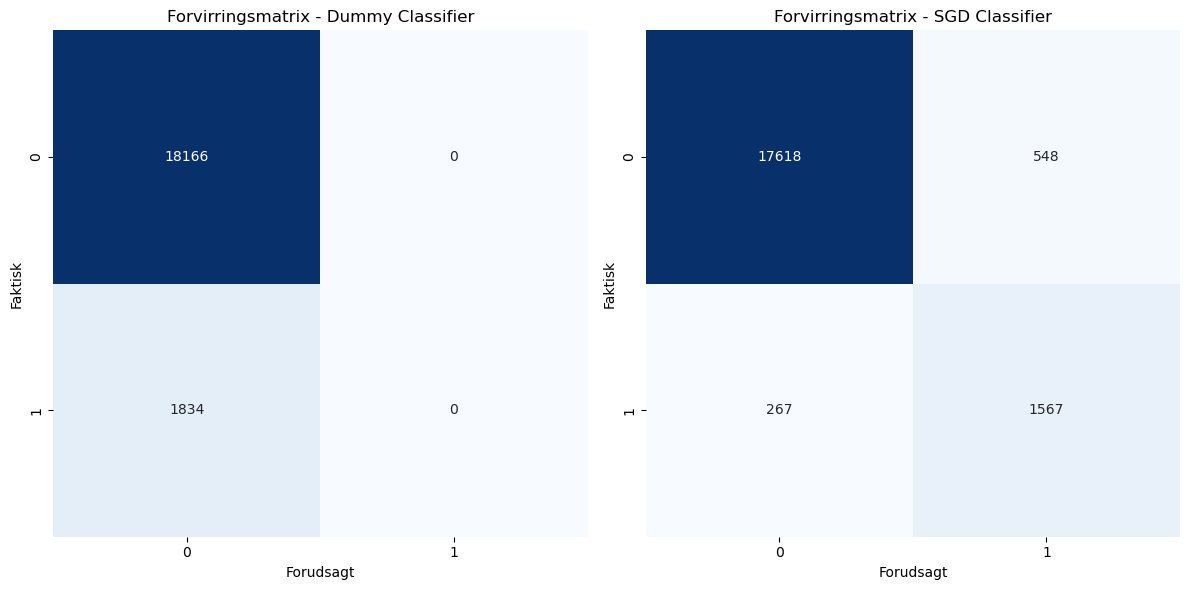

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Forvirringsmatrix for Dummy Classifier
M_dummy = np.array([[18166, 0],
                    [1834, 0]])

# Forvirringsmatrix for SGD Classifier
M_sgd = np.array([[17618, 548],
                  [267, 1567]])

# Opret en figur med subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Opret varmekort for begge forvirringsmatricer
sns.heatmap(M_dummy, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Forvirringsmatrix - Dummy Classifier')
axes[0].set_xlabel('Forudsagt')
axes[0].set_ylabel('Faktisk')

sns.heatmap(M_sgd, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Forvirringsmatrix - SGD Classifier')
axes[1].set_xlabel('Forudsagt')
axes[1].set_ylabel('Faktisk')

plt.tight_layout()
plt.show()


In [ ]:
# To forvirringsmatricer er defineret ved hjælp af NumPy-arrays. Disse matricer repræsenterer resultaterne af to forskellige klassifikatorer:
# Dummy Classifier og SGD Classifier.
# Hver forvirringsmatrix er en 2x2 matrix med fire værdier:
# Værdien øverst til venstre repræsenterer Sandt Negative (TN).
# Værdien øverst til højre repræsenterer Falske Positive (FP).
# Værdien nederst til venstre repræsenterer Falske Negative (FN).
# Værdien nederst til højre repræsenterer Sandt Positive (TP).

# Løst af en robot (AI)

### Qe Conclusion

In [ ]:
# Vi dykkede ned i metrikker som nøjagtighed, præcision, recall og F1-score for at kvantificere modelpræstationen. 
# Implementerede brugerdefinerede funktioner til præcision, recall og F1-score, hvilket fordybede vores forståelse af deres
# beregninger. Ved hjælp af Scikit-Learn anvendte vi standard evalueringsmetrikker, hvilket gjorde det muligt at sammenligne
# med vores brugerdefinerede implementeringer. Ved at vurdere en Dummy Classifier mod en SGD Classifier forstod vi 
# betydningen af modelvalg. Vi lærte vigtigheden af at opdele data i trænings- og testmængder for en realistisk 
# modelvurdering. Vi lærte, hvordan ubalancerede datasæt blev tydelige, hvilket understregede værdien af præcision og
# recall. Til sidst lærte vi varmekort for at skabe en klar præsentation og fortolkning af evalueringsresultaterne. Alt 
# i alt udstyrede disse øvelser os til at vurdere og sammenligne machine learning-modeller grundigt. Vi forstod 
# metriskompromisser, forfine vores færdigheder inden for dataopdeling og anerkendte udfordringerne ved ubalancerede data.
